In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f5781c73-5afb-218c-25a9-662155f2680b)


In [4]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob

In [5]:
#defining train and test directories
train=r'/content/Dataset/train'
test=r'/content/Dataset/test'
classes=glob('/content/Dataset/train/*')

In [6]:
#generating train and test images
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale =1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 rotation_range=0.2)
                                 
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_set=test_datagen.flow_from_directory(test,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 145 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [7]:
from keras.layers import Input, Dense, Flatten, Lambda
from keras.models import Model
from keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image

In [8]:
#loading the pretrained model
vgg19=VGG19(input_shape=(224,224,3),weights='imagenet',include_top=False)

for layer in vgg19.layers:
  layer.trainable=False

inputs=vgg19.input

x=Flatten()(vgg19.output)
x=Dense(1000,activation='relu')(x)
x=Dense(500,activation='relu')(x)

outputs=Dense(len(classes),activation='softmax')(x)

model=Model(inputs=inputs,outputs=outputs)

80150528/80134624 [==============================] - 2s 0us/step


In [9]:
#compiling and training the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist=model.fit(training_set,
               validation_data=test_set,
               epochs=30,
               verbose=1,
               steps_per_epoch=len(training_set),
               validation_steps=len(test_set)).history

Epoch 1/30
5/5 [==============================] - 18s 1s/step - loss: 4.5024 - accuracy: 0.6414 - val_loss: 4.3557 - val_accuracy: 0.6377
Epoch 2/30
5/5 [==============================] - 3s 605ms/step - loss: 0.5845 - accuracy: 0.8897 - val_loss: 2.0732e-08 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 3s 673ms/step - loss: 4.9328e-09 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9130
Epoch 4/30
5/5 [==============================] - 3s 614ms/step - loss: 0.0155 - accuracy: 0.9931 - val_loss: 0.1077 - val_accuracy: 0.9420
Epoch 5/30
5/5 [==============================] - 3s 606ms/step - loss: 1.5949e-07 - accuracy: 1.0000 - val_loss: 1.3648e-06 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 4s 864ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 3s 610ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accurac

In [10]:
#checking max and min values
training_features1= ['accuracy', 'val_accuracy']
training_features2= ['loss', 'val_loss']
for feature in training_features1:   
    print("The best max value obtained for {} is :".format(feature),max(hist[feature]))

for feature in training_features2:   
    print("The best min value obtained for {} is :".format(feature),min(hist[feature]))

The best max value obtained for accuracy is : 1.0
The best max value obtained for val_accuracy is : 1.0
The best min value obtained for loss is : 0.0
The best min value obtained for val_loss is : 0.0


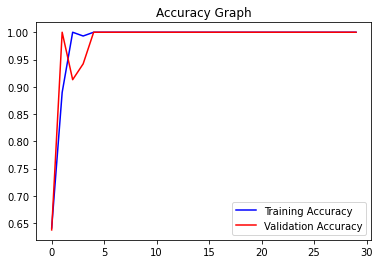

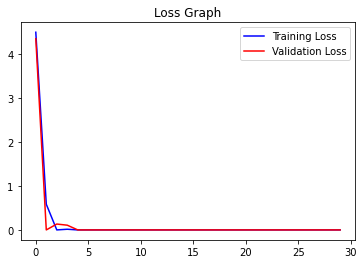

In [11]:
#plotting loss vs val_loss and acc vs val_acc
acc = hist['accuracy']
val_acc = hist['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = hist['loss']
val_loss = hist['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [12]:
#saving model and weights
model.save('face_recognition_model.h5')
model.save_weights('weights.h5')